In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [2]:
df = pd.read_csv("D:/Learnbay/Stats & ML by Kumar Sundaram Sir/Notes/ML/Decision Tree/Churn_Modelling.csv")
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.shape

(10000, 14)

In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df1 =df.copy()

In [7]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
df = df.drop(['RowNumber','CustomerId','Surname','Geography'],axis =1)
df.head()

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619  Female   42       2       0.00              1          1   
1          608  Female   41       1   83807.86              1          0   
2          502  Female   42       8  159660.80              3          1   
3          699  Female   39       1       0.00              2          0   
4          850  Female   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  
0               1        101348.88       1  
1               1        112542.58       0  
2               0        113931.57       1  
3               0         93826.63       0  
4               1         79084.10       0

In [9]:
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [10]:
df["Gender"] = df["Gender"].astype('category')
df["Gender"] = df["Gender"].cat.codes

In [11]:
df.head()

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       0   42       2       0.00              1          1   
1          608       0   41       1   83807.86              1          0   
2          502       0   42       8  159660.80              3          1   
3          699       0   39       1       0.00              2          0   
4          850       0   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  
0               1        101348.88       1  
1               1        112542.58       0  
2               0        113931.57       1  
3               0         93826.63       0  
4               1         79084.10       0

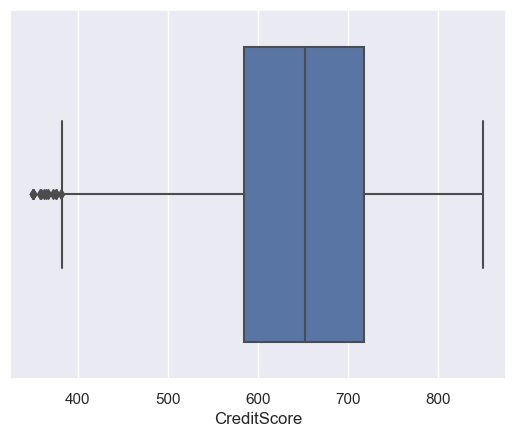

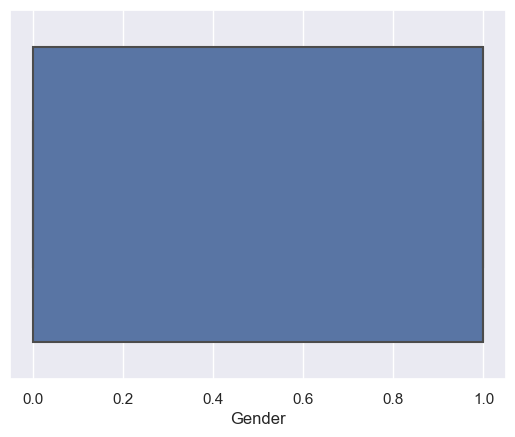

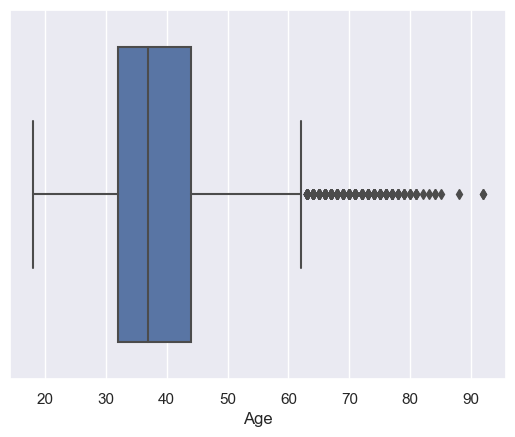

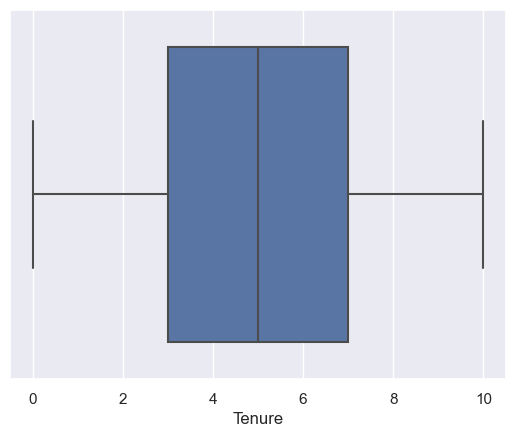

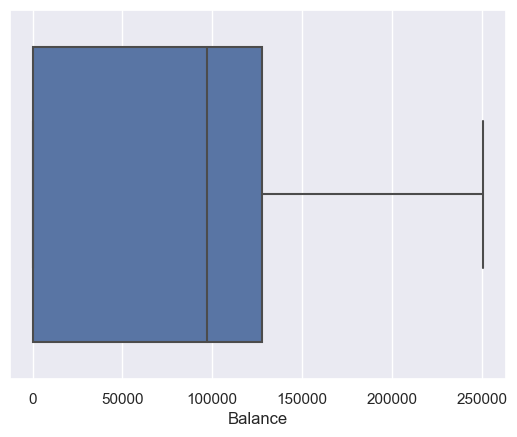

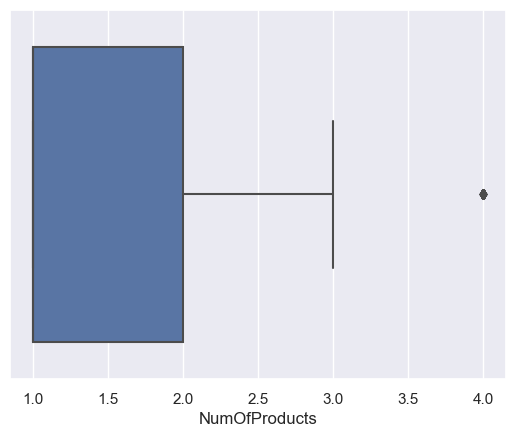

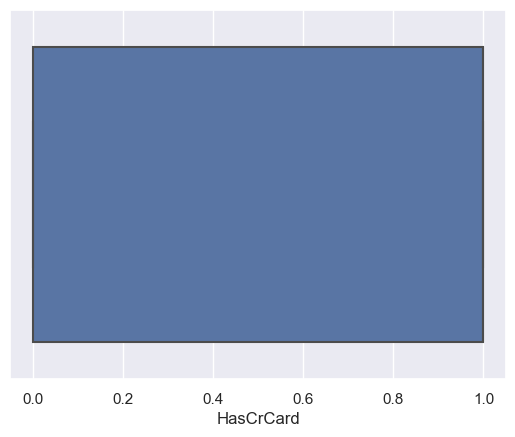

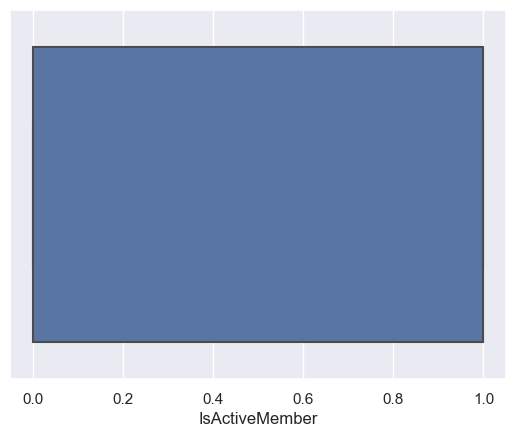

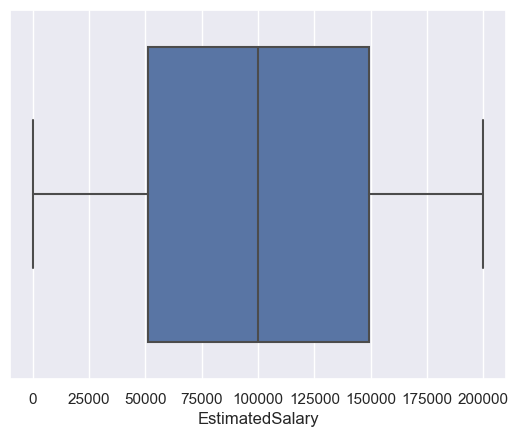

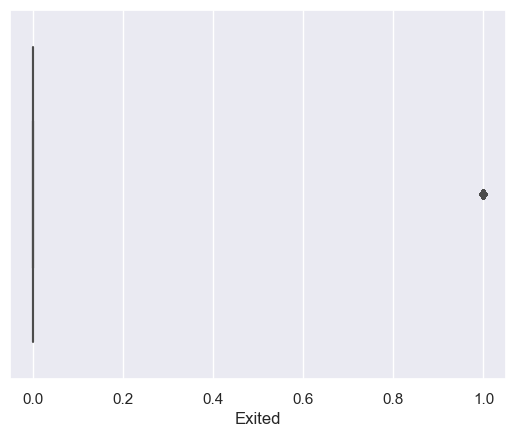

In [12]:
def boxplot(col):
    sns.boxplot(df[col])
    plt.show()
    
for i in list(df.columns)[0:]:
    boxplot(i)

In [13]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [14]:
for i in df:
    print("*************************************",i,"*********************")
    print()
    print(set(df[i].tolist()))

************************************* CreditScore *********************

{350, 351, 358, 359, 363, 365, 367, 373, 376, 382, 383, 386, 395, 399, 401, 404, 405, 407, 408, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 5

In [15]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file("EDA for Churn Dataset")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### EDA

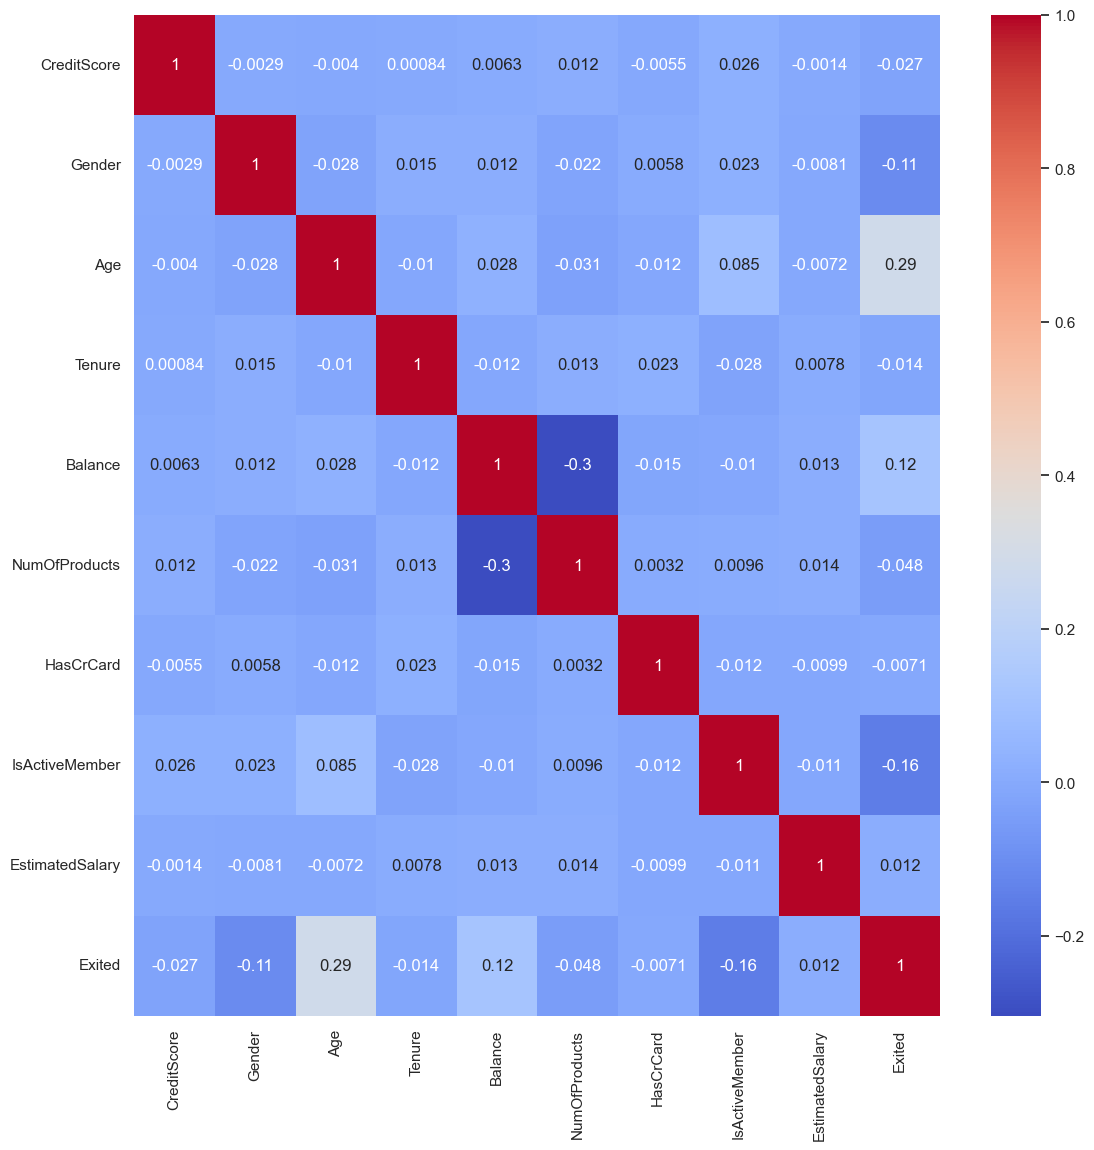

In [16]:
plt.figure(figsize = (13,13))
sns.heatmap(df.corr(),annot =True,cmap = 'coolwarm')
plt.show()

In [17]:
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [18]:
x = df.drop(['Exited'],axis =1)
y= df[['Exited']]

In [19]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote,y_smote = smote.fit_resample(x,y)

In [20]:
print(y.value_counts())
print()
print(y_smote.value_counts())

Exited
0         7963
1         2037
dtype: int64

Exited
0         7963
1         7963
dtype: int64


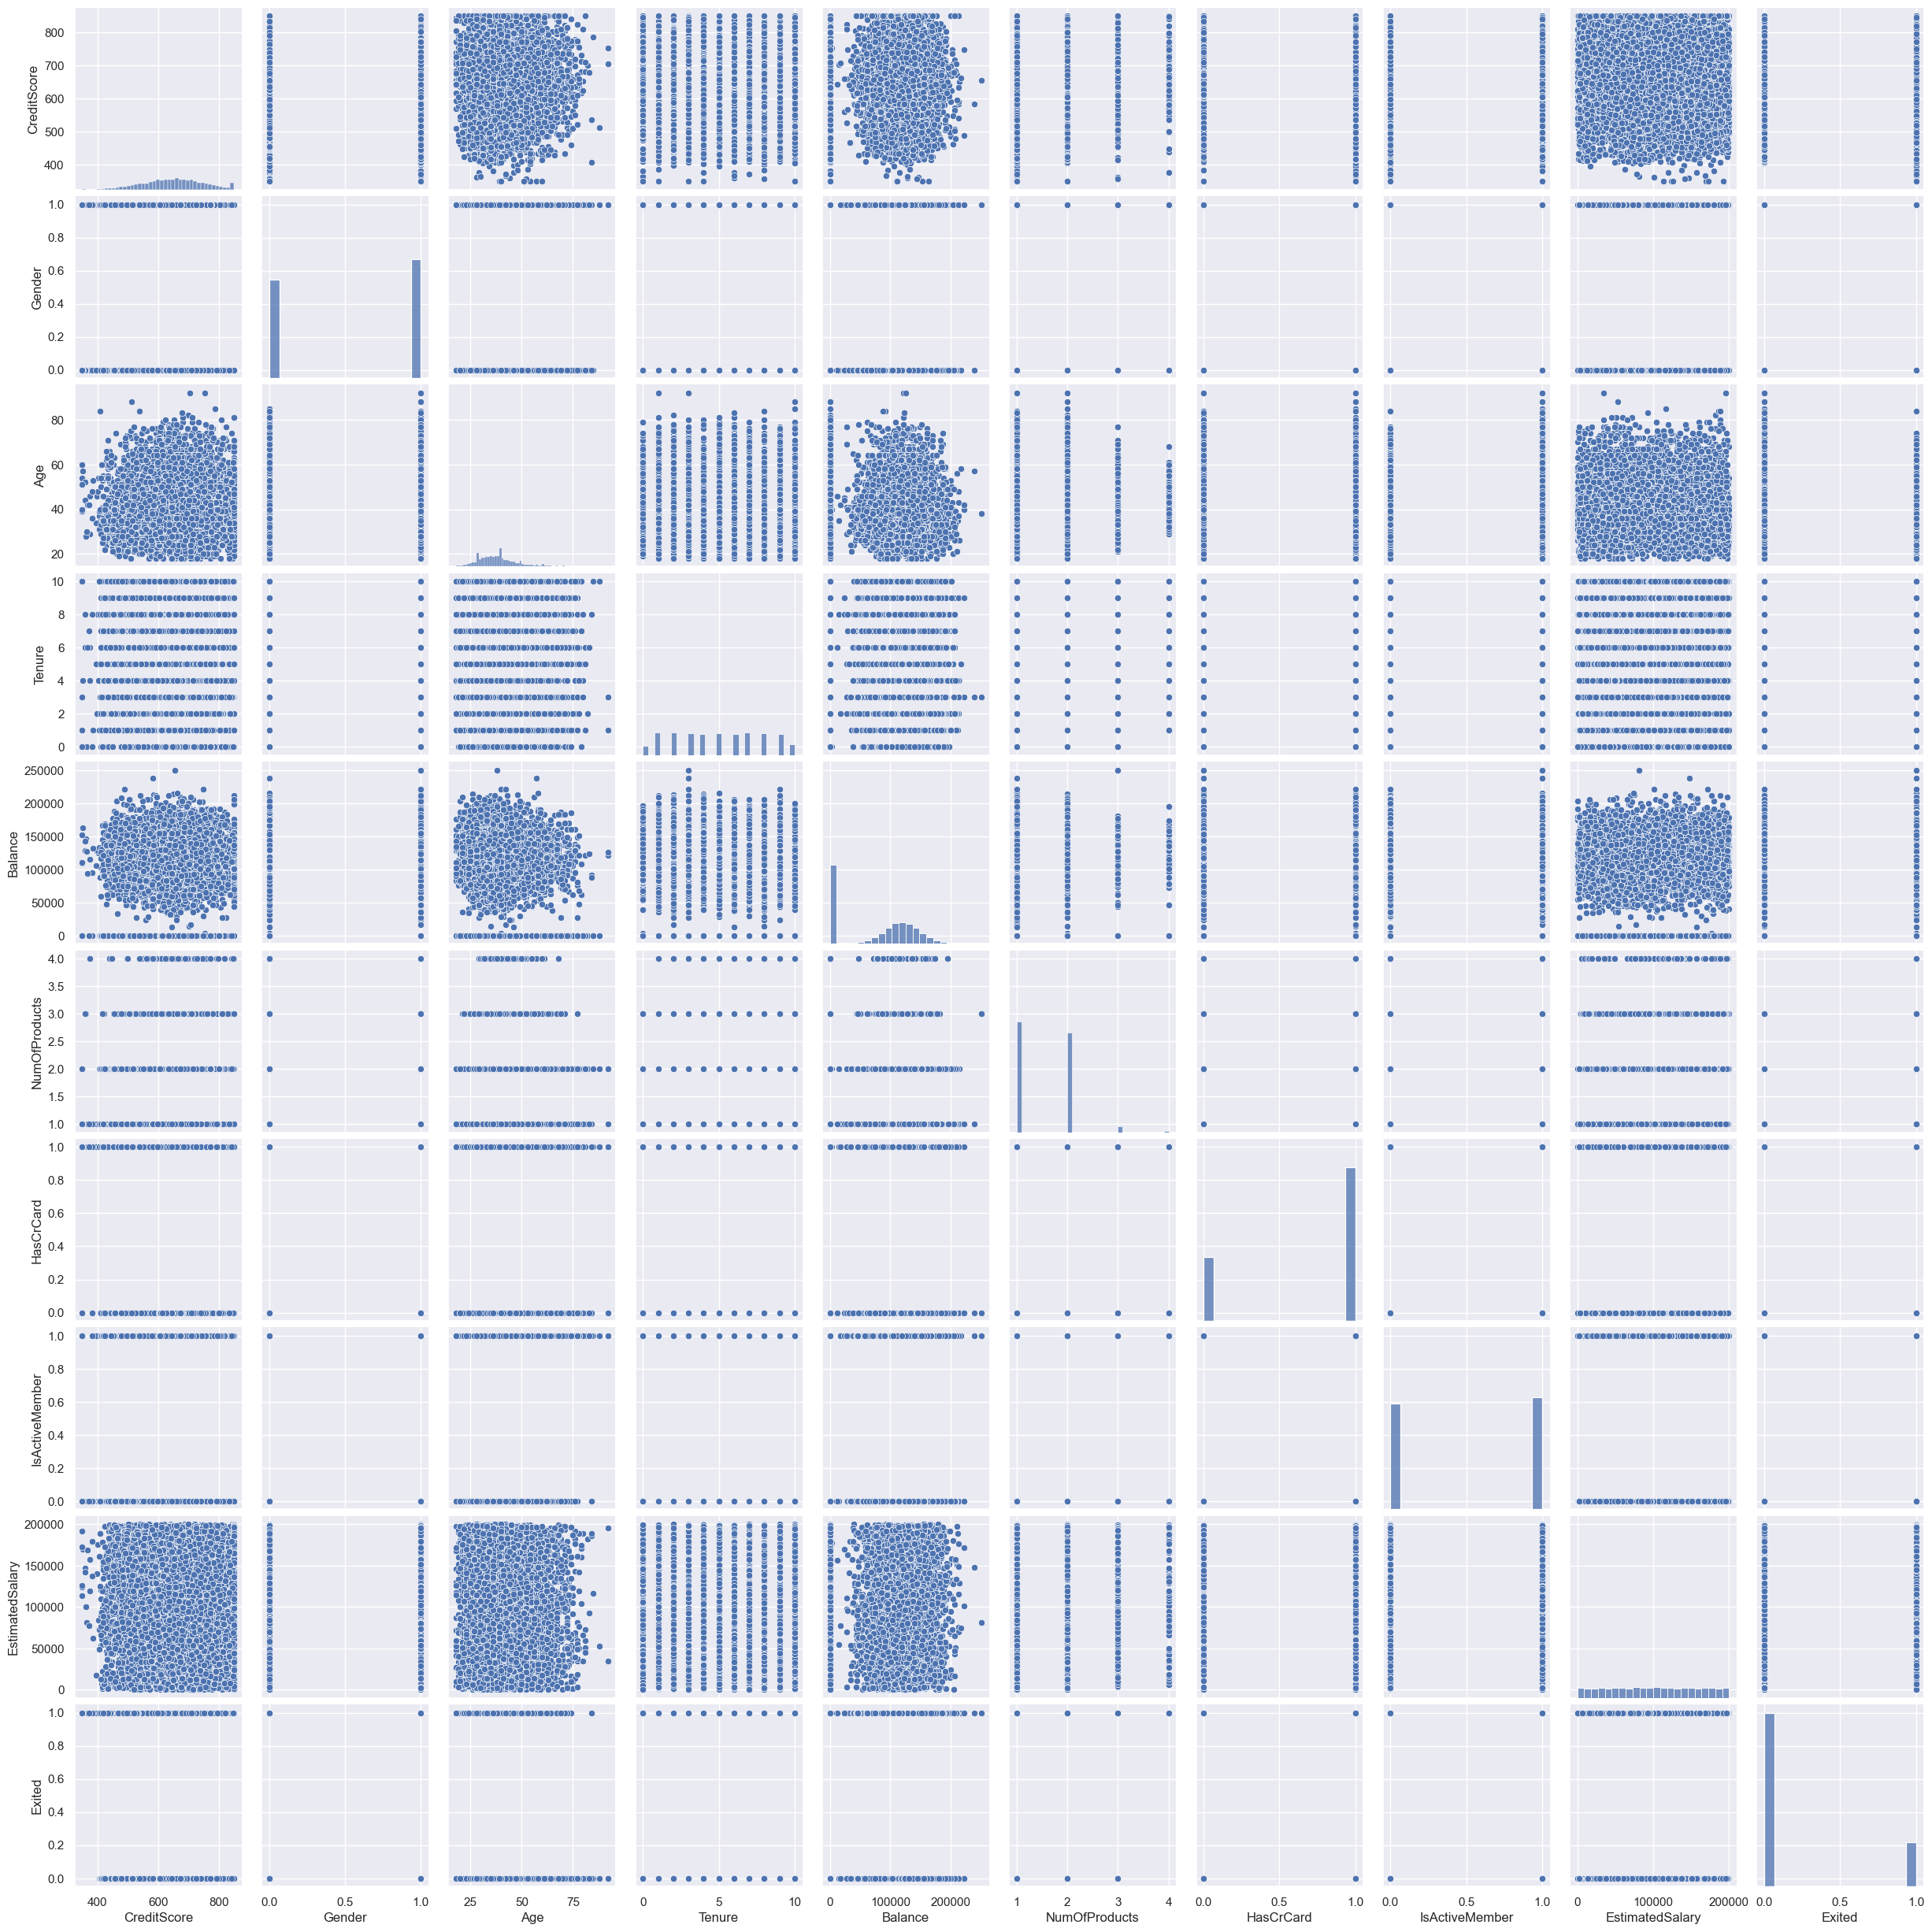

In [21]:
sns.pairplot(df)

<Figure size 1500x500 with 0 Axes>

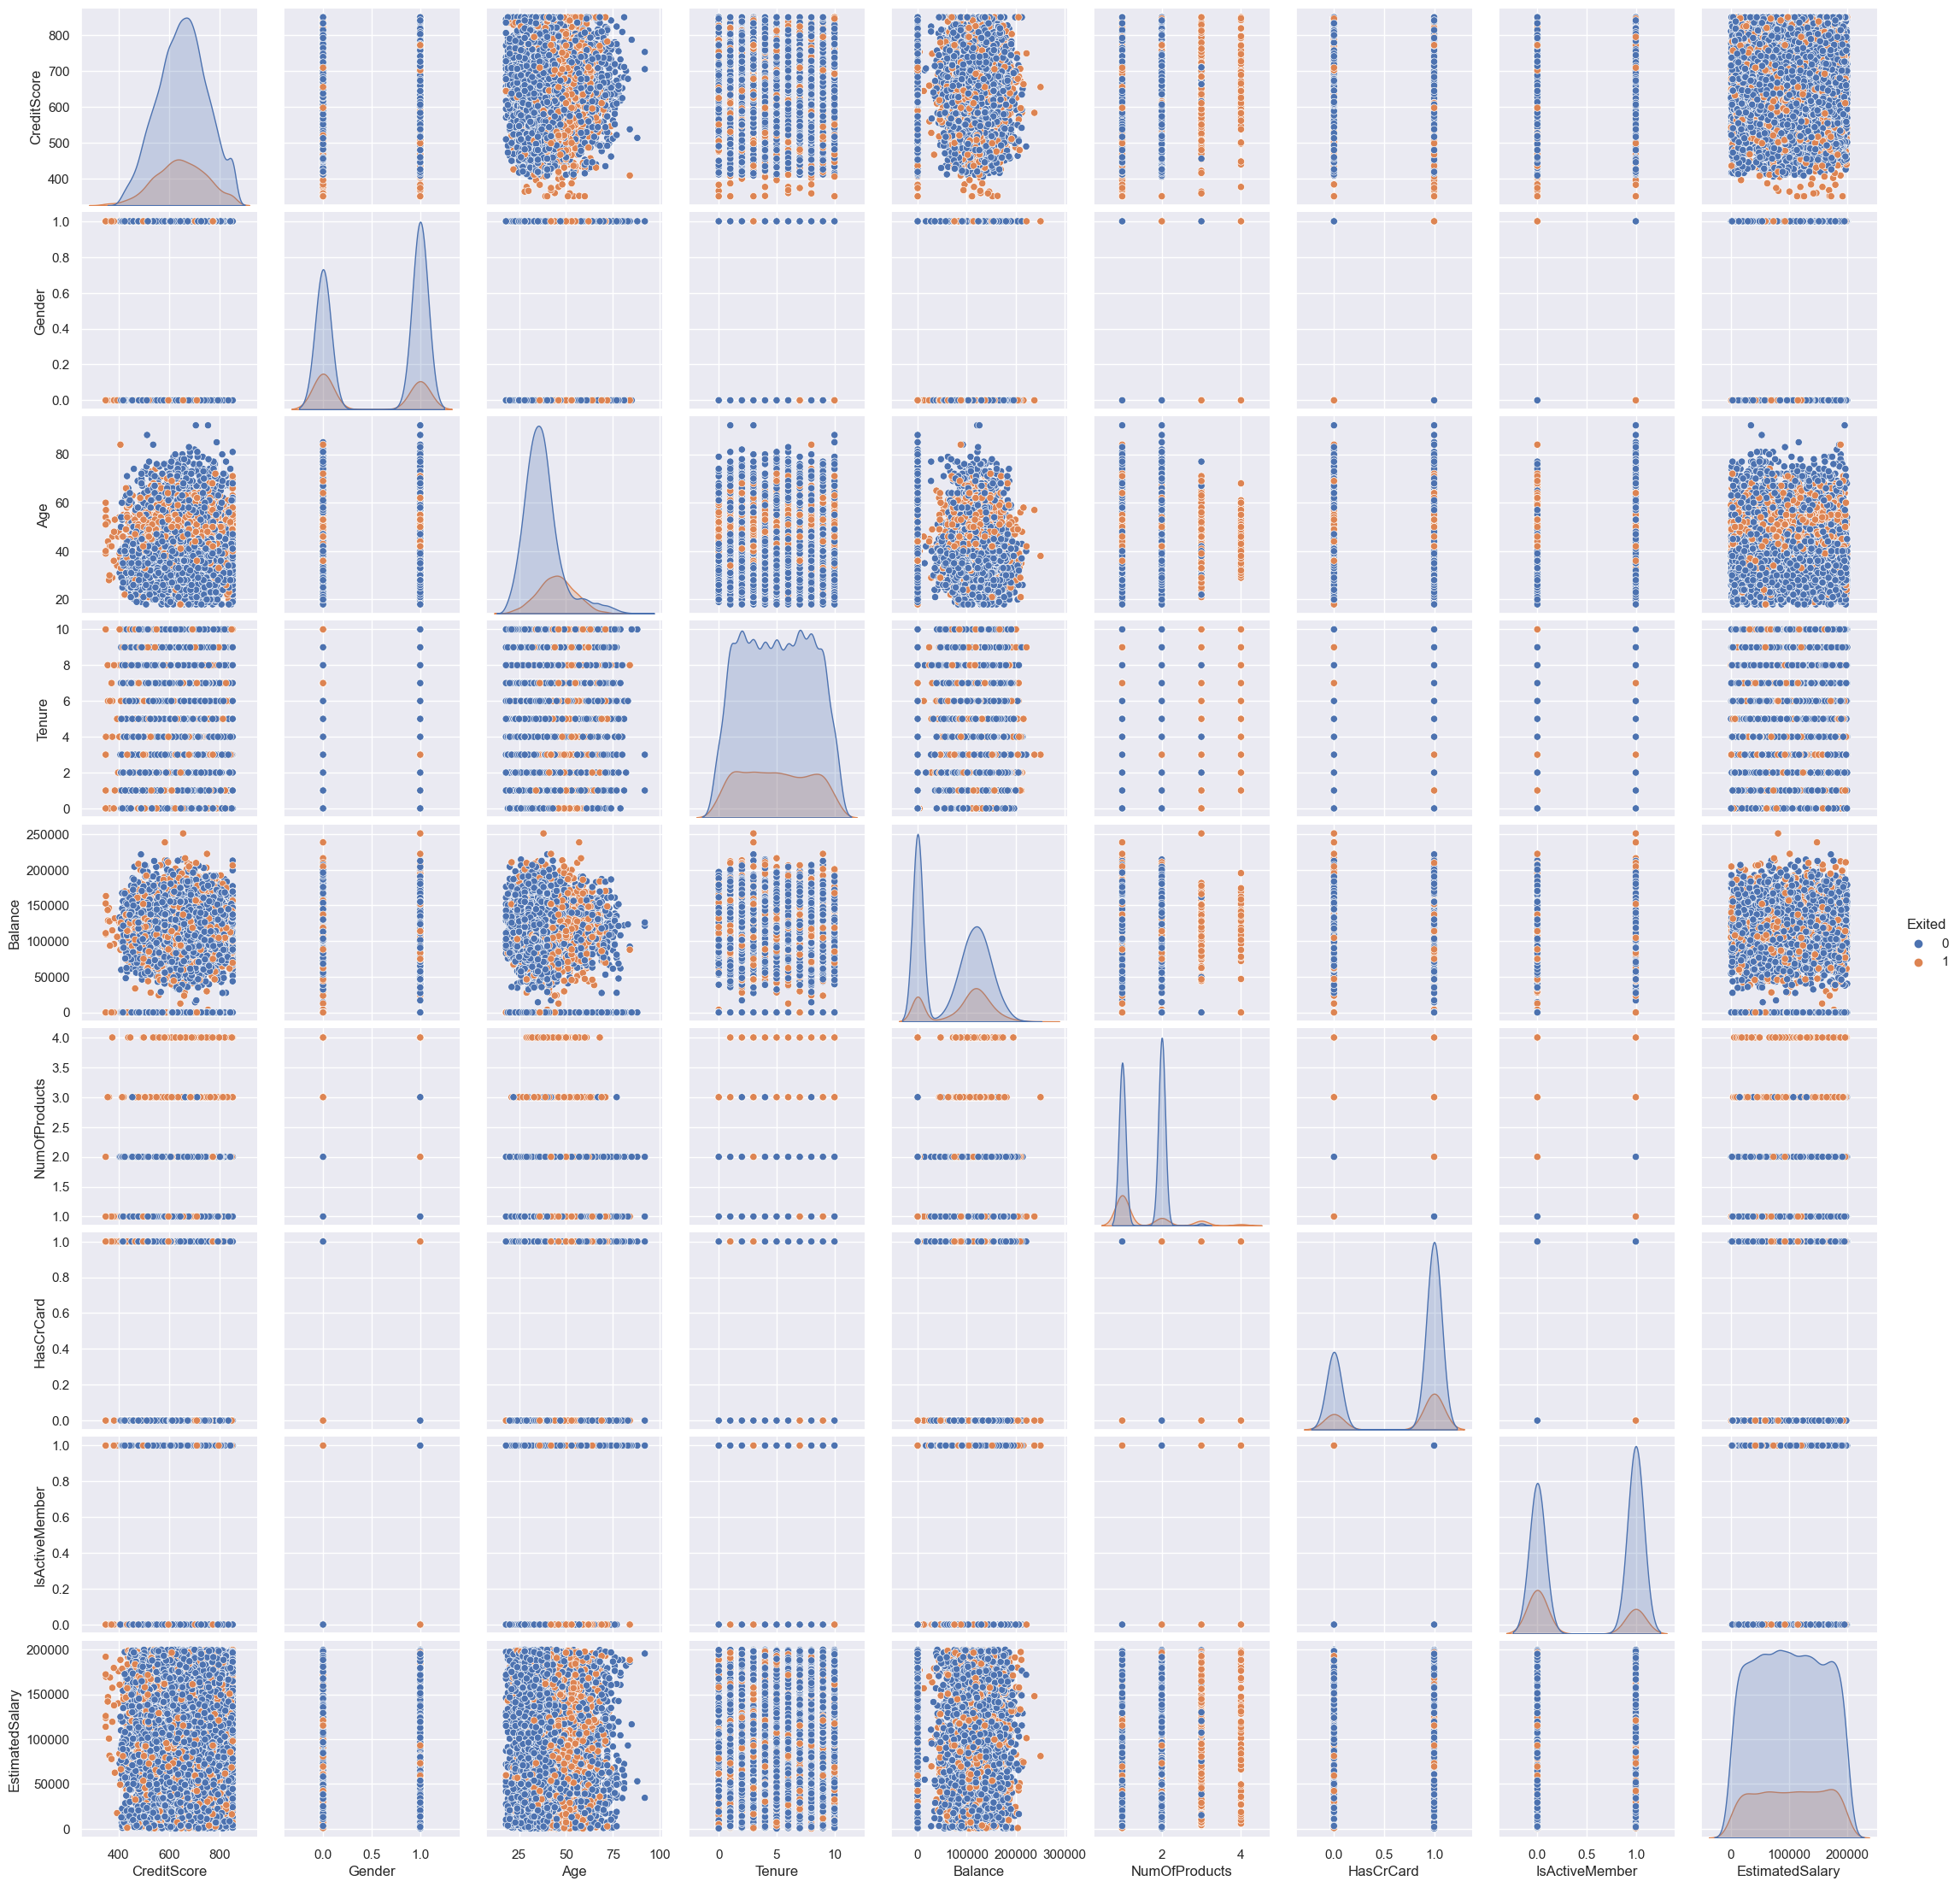

In [22]:
plt.figure(figsize = (15,5))
sns.pairplot(data = df,hue = 'Exited')
plt.show()

In [23]:
# split the data into train and test

x_train,x_test,y_train,y_test =train_test_split(x,y,test_size = 0.25,random_state =1, stratify = y)

In [24]:
# Building Decision Tree Classifier Model

from sklearn.tree import DecisionTreeClassifier
dtree1 = DecisionTreeClassifier(criterion='gini')
dtree1.fit(x_train,y_train)

dtree2 = DecisionTreeClassifier(criterion='entropy')
dtree2.fit(x_train,y_train)



DecisionTreeClassifier(criterion='entropy')

In [25]:
y_pred_dt1_train = dtree1.predict(x_train)
y_pred_dt1_test = dtree1.predict(x_test)

y_pred_dt2_train = dtree2.predict(x_train)
y_pred_dt2_test = dtree2.predict(x_test)

In [26]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [27]:
print(confusion_matrix(y_train,y_pred_dt1_train))
print()
print(confusion_matrix(y_test,y_pred_dt1_test))
print()
print(confusion_matrix(y_train,y_pred_dt2_train))
print()
print(confusion_matrix(y_test,y_pred_dt2_test))

[[5972    0]
 [   0 1528]]

[[1710  281]
 [ 270  239]]

[[5972    0]
 [   0 1528]]

[[1716  275]
 [ 275  234]]


In [28]:
print("Gini Training:",classification_report(y_train,y_pred_dt1_train))
print()
print("Gini Test :",classification_report(y_test,y_pred_dt1_test))
print()
print("Entropy Training :",classification_report(y_train,y_pred_dt2_train))
print()
print("Entropy Test :",classification_report(y_test,y_pred_dt2_test))

Gini Training:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5972
           1       1.00      1.00      1.00      1528

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500


Gini Test :               precision    recall  f1-score   support

           0       0.86      0.86      0.86      1991
           1       0.46      0.47      0.46       509

    accuracy                           0.78      2500
   macro avg       0.66      0.66      0.66      2500
weighted avg       0.78      0.78      0.78      2500


Entropy Training :               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5972
           1       1.00      1.00      1.00      1528

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00   

In [29]:
print(accuracy_score(y_train,y_pred_dt1_train))
print()
print(accuracy_score(y_test,y_pred_dt1_test))
print()
print(accuracy_score(y_train,y_pred_dt2_train))
print()
print(accuracy_score(y_test,y_pred_dt2_test))

1.0

0.7796

1.0

0.78


In [30]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(dtree2,x_train,y_train,cv =10)
test_accuracy = cross_val_score(dtree2,x_test,y_test,cv =10)
print(training_accuracy)
print()
print(test_accuracy)
print()
print("Training Mean Accuracy:",training_accuracy.mean())
print()
print("Training Max Accuracy:",training_accuracy.max())
print()
print("Test Mean Accuracy:",test_accuracy.mean())
print()
print("Test Max Accuracy:",test_accuracy.max())

[0.788      0.776      0.776      0.78933333 0.76666667 0.77866667
 0.77333333 0.79066667 0.77866667 0.77733333]

[0.784 0.776 0.78  0.8   0.8   0.796 0.796 0.776 0.744 0.748]

Training Mean Accuracy: 0.7794666666666666

Training Max Accuracy: 0.7906666666666666

Test Mean Accuracy: 0.78

Test Max Accuracy: 0.8


In [31]:
# always we have to select cross validation accuracy as the final one

print("*******************************Final Accuracy for Training and Test Result**********************")
print()
print("Training Accuracy:",training_accuracy.mean())
print()
print("Test Accuracy:",accuracy_score(y_test,y_pred_dt2_test))

*******************************Final Accuracy for Training and Test Result**********************

Training Accuracy: 0.7794666666666666

Test Accuracy: 0.78


## Feature Importance Variable

In [32]:
dtree2.feature_importances_

array([0.18149068, 0.01844196, 0.22197624, 0.07866069, 0.13684086,
       0.12074943, 0.0181105 , 0.03983624, 0.18389338])

In [33]:
x.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [34]:
pd.DataFrame(index = x.columns,data = dtree2.feature_importances_,columns = ['Feature Importance'])

Feature Importance
CreditScore                0.181491
Gender                     0.018442
Age                        0.221976
Tenure                     0.078661
Balance                    0.136841
NumOfProducts              0.120749
HasCrCard                  0.018111
IsActiveMember             0.039836
EstimatedSalary            0.183893

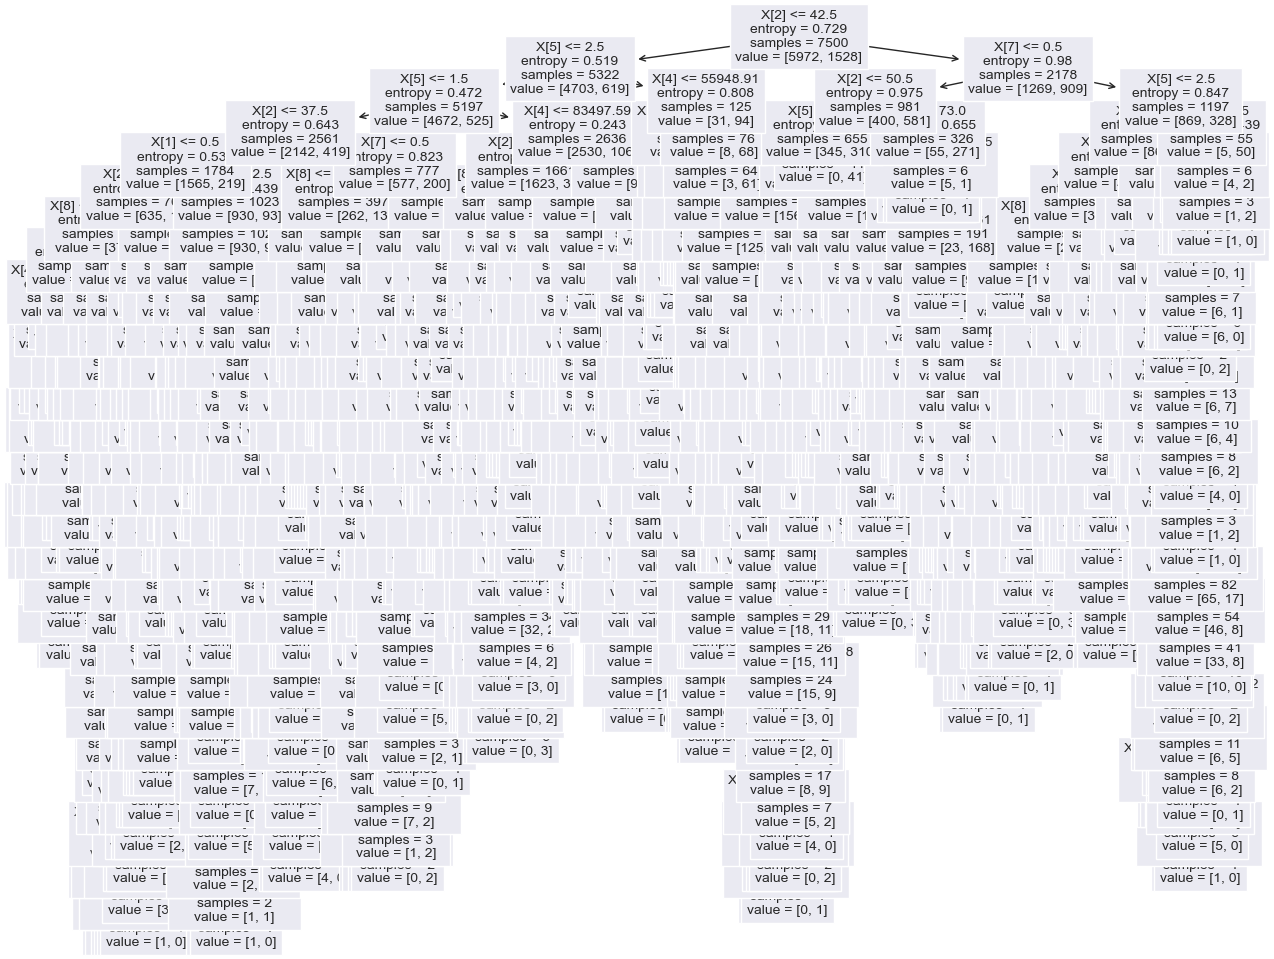

In [35]:
from sklearn.tree import plot_tree
plt.figure(figsize = (15,12))
plot_tree(dtree2,fontsize =10)
plt.show()

In [37]:
prunned_dt = DecisionTreeClassifier(max_depth = 2)
prunned_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [38]:
y_pred = prunned_dt.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_dt2_test)

print("Accuracy:", accuracy)


Accuracy: 0.78


# Decision Tree with Regression 

In [43]:
# Test Accuracy is very low because this is not a regression problem, it is a classification problem.

# Pickling the Model file for Deployment

In [44]:
import pickle

In [45]:
pickle.dump(dtree1,open('dtree1.pkl','wb'))

In [46]:
pickle_model = pickle.load(open('dtree1.pkl','rb'))

In [56]:
first_row = x.iloc[0].values.reshape(1, -1)

In [57]:
# Prediction
pickle_model.predict(first_row)
# array is the output/target variable

array([1], dtype=int64)

In [60]:
second_row = x.iloc[1].values.reshape(1, -1)

In [61]:
pickle_model.predict(second_row)

array([0], dtype=int64)

In [62]:
os.getcwd()

'C:\\Users\\achyu\\Learnbay\\Machine Learning & Statistics\\Kumar Sundaram Sir\\ML\\Decision Tree'